# Medição da espessura de um fio de cabelo por difração

$$d = \frac{2\cdot m\cdot\lambda\sqrt{x^2 + (y_m/2)^2}}{y_m}$$
$$y_m = \frac{Y_{\text{max}}+Y_{\text{min}}}{2}$$

In [69]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.medicoes import (Me, average, sqrt_me as sqrt)

def espessura(lambda_:Me, x:Me, y_m:Me, m:int) -> Me:
    return 2*m*lambda_*sqrt(x**2+(y_m/2)**2)/y_m

def espessura_arr(lambda_:Me, x:Me, y:list[Me]):
    arr:list[Me] = []
    for m, y_m in enumerate(y):
        arr.append(espessura(lambda_, x, y_m, m+1))
    return arr

## Dados

In [70]:
lambda_ = Me(670, 10, 10**-9) # [Hz] - Frequência do laser 

def trena(m: float): # [cm]
    return Me(m, 0.1, 10**-2)
def regua(m: float): # [cm]
    return Me(m, 0.05, 10**-2)
def paqui(m:float): # [mm]
    return Me(m, 0.05, 10**-3)
def micro(m:float): # [mm]
    return Me(m, 0.005, 10**-3)

### Cabelo Lucas

In [71]:
espessura_micro = micro(0.071)
x = trena(267.75)-trena(30) # [m] - Distância do fio de cabelo com o anteparo
y_arr = [   # Distância entre os máximo de ordem m+1
    (paqui(53.55)+paqui(34.45))/Me(2),
    (paqui(84.40)+paqui(64.60))/Me(2),
    (paqui(114.90)+paqui(95.10))/Me(2),
    (paqui(145.00)+paqui(127.20))/Me(2),
    (regua(17.26)+regua(15.53))/Me(2)
]

d_arr = espessura_arr(
    lambda_ = lambda_,
    x = x,
    y = y_arr
)
print(espessura_micro)
print(average(d_arr))
d_arr

0.0000710 ± 0.0000050
0.0000880 ± 0.0000013


[0.0000724 ± 0.0000011,
 0.0000855 ± 0.0000013,
 0.0000910 ± 0.0000014,
 0.0000937 ± 0.0000014,
 0.0000972 ± 0.0000015]

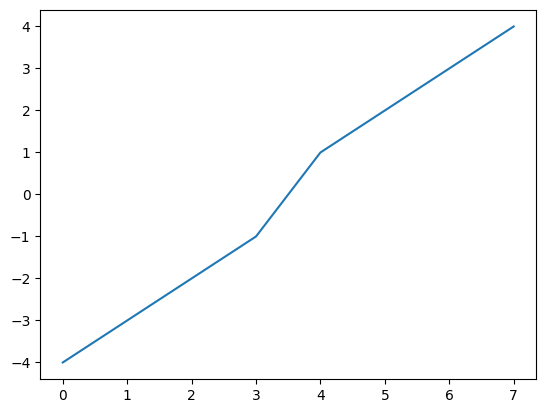

In [72]:
fig, ax = plt.subplots(1,1)

ax.plot([-4,-3,-2,-1,1,2,3,4],)

### Cabelo Pamela

In [73]:
espessura_micro = micro(0.049)
x = trena(264.7)-trena(30) # [m] - Distância do fio de cabelo com o anteparo
y_arr = [   # Distância entre os máximo de ordem m+1
    (paqui(101.20)+paqui(67.15))/Me(2),
    (paqui(155.10)+paqui(123.50))/Me(2),
    (regua(21.35)+regua(18.40))/Me(2)
]

d_arr = espessura_arr(
    lambda_ = lambda_,
    x = x,
    y = y_arr
)
print(espessura_micro)
print(average(d_arr))
d_arr

0.0000490 ± 0.0000050
0.00004335 ± 0.00000065


[0.00003737 ± 0.00000056, 0.00004517 ± 0.00000067, 0.00004751 ± 0.00000071]

### Cabelo Gabi

In [74]:
espessura_micro = micro(0.059)
x = trena(264.7)-trena(30) # [m] - Distância do fio de cabelo com o anteparo
y_arr = [   # Distância entre os máximo de ordem m+1
    (paqui(59.00)+paqui(37.80))/Me(2),
    (paqui(90.75)+paqui(68.95))/Me(2),
    (paqui(122.90)+paqui(102.20))/Me(2),
    #(regua(15.8)+regua(13.8))/Me(2),
]

d_arr = espessura_arr(
    lambda_ = lambda_,
    x = x,
    y = y_arr
)
print(espessura_micro)
print(average(d_arr))
d_arr

0.0000590 ± 0.0000050
0.0000759 ± 0.0000011


[0.00006498 ± 0.00000097, 0.0000788 ± 0.0000012, 0.0000839 ± 0.0000013]